In [34]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
   ('Airline Dataset.csv', 'Airline_Dataset')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql@123',
    database='airline'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:\Accenture Certificates and Projects'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing Airline Dataset.csv
NaN values before replacement:
Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import warnings
warnings.filterwarnings("ignore")

db_config = {
    "host" : "localhost",
    "user" : "root",
    "password" : "Mysql@123",
    "database" : "airline"
}

connection  = pymysql.connect(**db_config)

query = "SELECT * FROM airline_dataset"

df = pd.read_sql(query,connection)

connection.close()
print(df.head().to_string(index=False))


Passenger_ID First_Name Last_Name Gender  Age Nationality              Airport_Name Airport_Country_Code  Country_Name Airport_Continent    Continents Departure_Date Arrival_Airport          Pilot_Name Flight_Status
      ABVWIg     Edithe    Leggis Female   62       Japan          Coldfoot Airport                   US United States               NAM North America      6/28/2022             CXF Fransisco Hazeldine       On Time
      jkXXAX     Elwood      Catt   Male   62   Nicaragua         Kugluktuk Airport                   CA        Canada               NAM North America     12/26/2022             YCO     Marla Parsonage       On Time
      CdUz2g      Darby   Felgate   Male   67      Russia    Grenoble-Isère Airport                   FR        France                EU        Europe      1/18/2022             GNB        Rhonda Amber       On Time
      BRS38V   Dominica      Pyle Female   71       China Ottawa / Gatineau Airport                   CA        Canada               NAM

In [3]:
# data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_ID          98619 non-null  object
 1   First_Name            98619 non-null  object
 2   Last_Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport_Name          98619 non-null  object
 7   Airport_Country_Code  98619 non-null  object
 8   Country_Name          98619 non-null  object
 9   Airport_Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure_Date        98619 non-null  object
 12  Arrival_Airport       98619 non-null  object
 13  Pilot_Name            98619 non-null  object
 14  Flight_Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [37]:
# summary statistics
print(df.describe())

                Age
count  98619.000000
mean      45.504021
std       25.929849
min        1.000000
25%       23.000000
50%       46.000000
75%       68.000000
max       90.000000


In [39]:
# Total Countries 
countries = df['Country_Name'].nunique()
print(countries)

235


In [41]:
# count by country name
print(df['Country_Name'].value_counts().to_string())

Country_Name
United States                                   22104
Australia                                        6370
Canada                                           5424
Brazil                                           4504
Papua New Guinea                                 4081
China                                            2779
Indonesia                                        2358
Russian Federation                               2247
Colombia                                         1643
India                                            1486
France                                           1382
United Kingdom                                   1371
Argentina                                        1203
Germany                                          1161
Mexico                                           1073
Japan                                            1004
South Africa                                      945
Iran, Islamic Republic of                         816
Philippines    

In [43]:
# Total Airports
airports = df['Airport_Name'].nunique()
print(airports)

9062


In [44]:
# count by airport name
print(df['Airport_Name'].value_counts().to_string())

Airport_Name
San Pedro Airport                                                    43
Santa Maria Airport                                                  38
Böblingen Flugfeld                                                   36
Santa Ana Airport                                                    35
San Fernando Airport                                                 31
Mae Hong Son Airport                                                 29
Capital City Airport                                                 28
Cochrane Airport                                                     28
Santa Rosa Airport                                                   28
Bathurst Airport                                                     27
Mount Pleasant Airport                                               27
Nogales International Airport                                        27
Herrera Airport                                                      27
Punta Colorada Airport                             

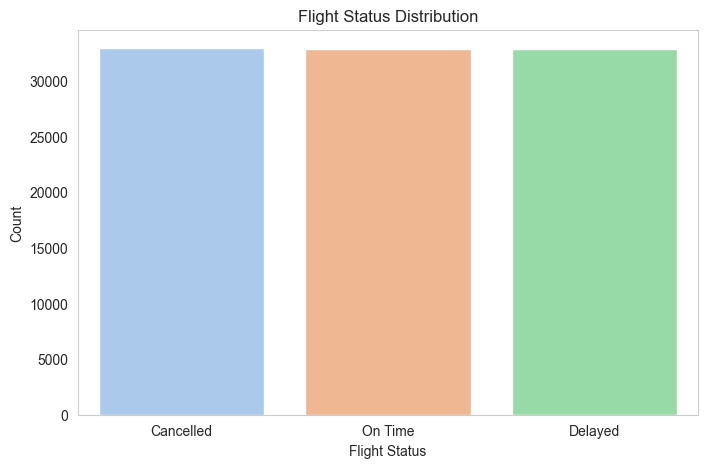

In [45]:
# Flight Status Distribution
status_counts = df['Flight_Status'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')
plt.title('Flight Status Distribution')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


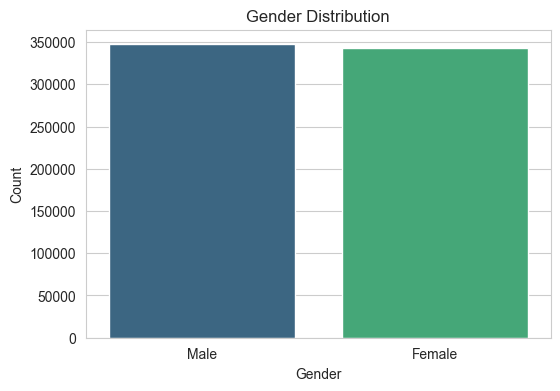

In [9]:
# Gender Distribution
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


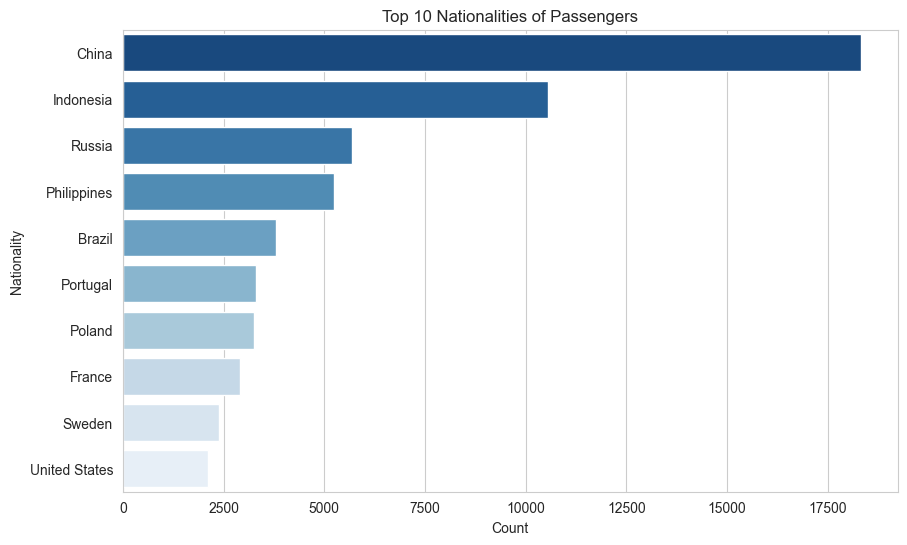

In [47]:
# Top 10 Nationalities of Passengers
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
top_nationalities = df['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='Blues_r')
plt.title('Top 10 Nationalities of Passengers')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()


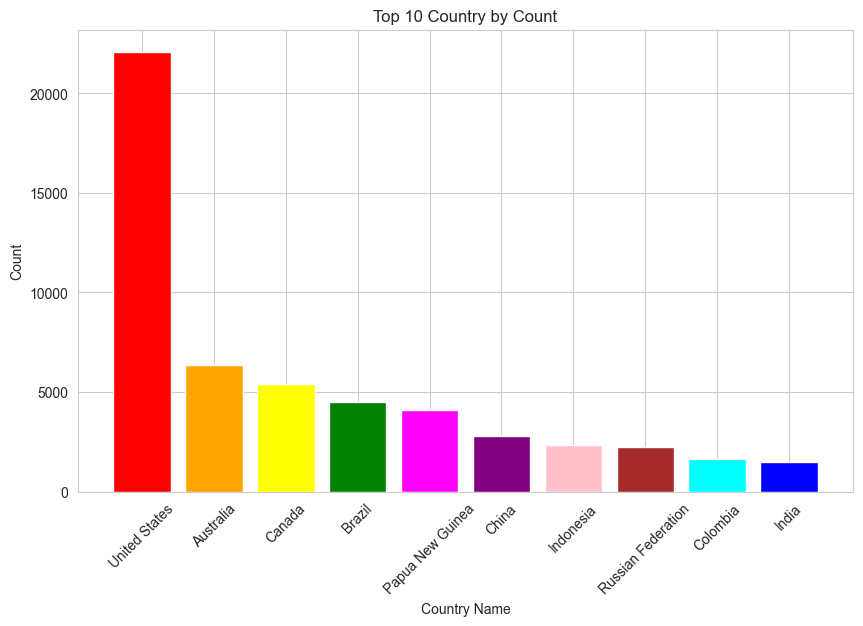

In [49]:
# Top 10 Country by Count
flight_count = df['Country_Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'yellow', 'green', 'magenta', 'purple', 'pink', 'brown', 'cyan', 'blue']  # Different colors for columns

plt.bar(flight_count.index, flight_count.values, color=colors)

plt.xlabel("Country Name")
plt.ylabel("Count")
plt.title("Top 10 Country by Count")
plt.xticks(rotation=45)

plt.show()


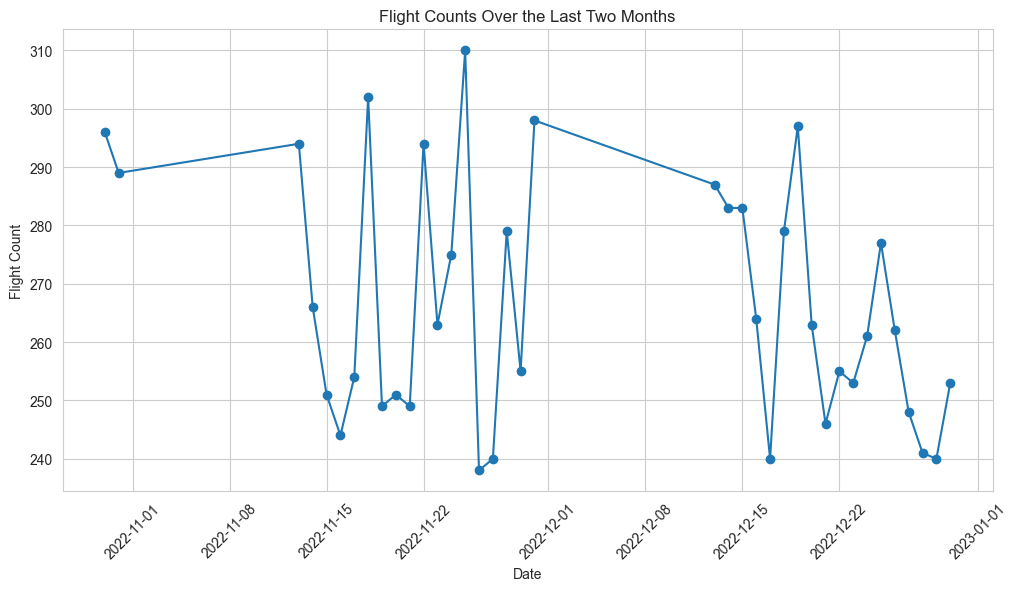

In [50]:
# Convert date column to datetime, allowing multiple formats
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'], errors='coerce')

# Drop rows with invalid dates (if any)
df = df.dropna(subset=['Departure_Date'])

# Filter data for the last two months
latest_date = df['Departure_Date'].max()
two_months_ago = latest_date - pd.DateOffset(months=2)
df_filtered = df[df['Departure_Date'] >= two_months_ago]

# Count occurrences per day
daily_counts = df_filtered.groupby(df_filtered['Departure_Date'].dt.date).size()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Flight Count")
plt.title("Flight Counts Over the Last Two Months")
plt.xticks(rotation=45) 

plt.show()


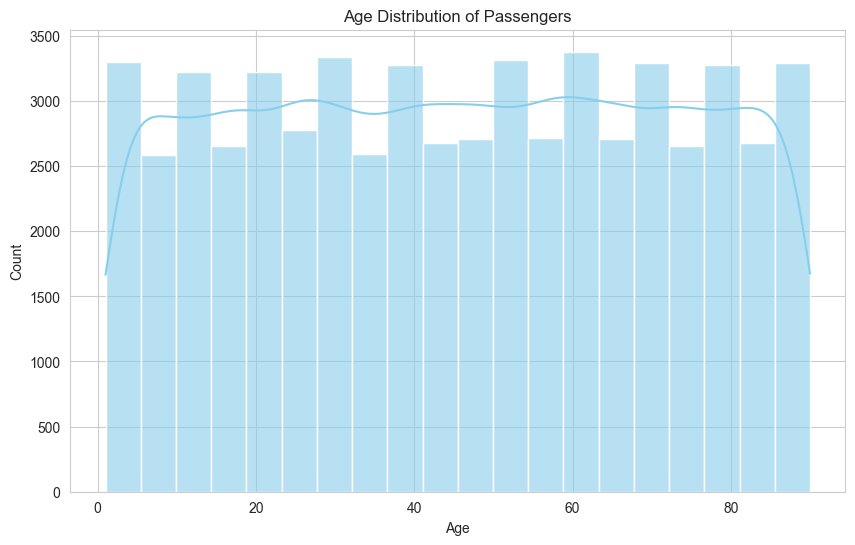

In [51]:
# Age Distribution of Passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', alpha=0.6)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


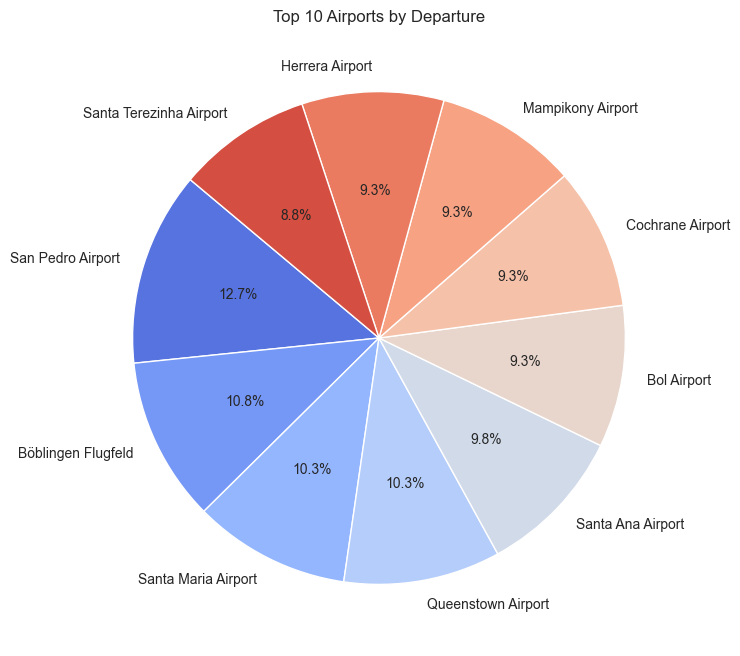

In [52]:
# Top 10 Airports by Departure
sns.set_style('whitegrid')

top_airports = df['Airport_Name'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_airports.values, labels=top_airports.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 10), startangle=140)
plt.title('Top 10 Airports by Departure')
plt.show()


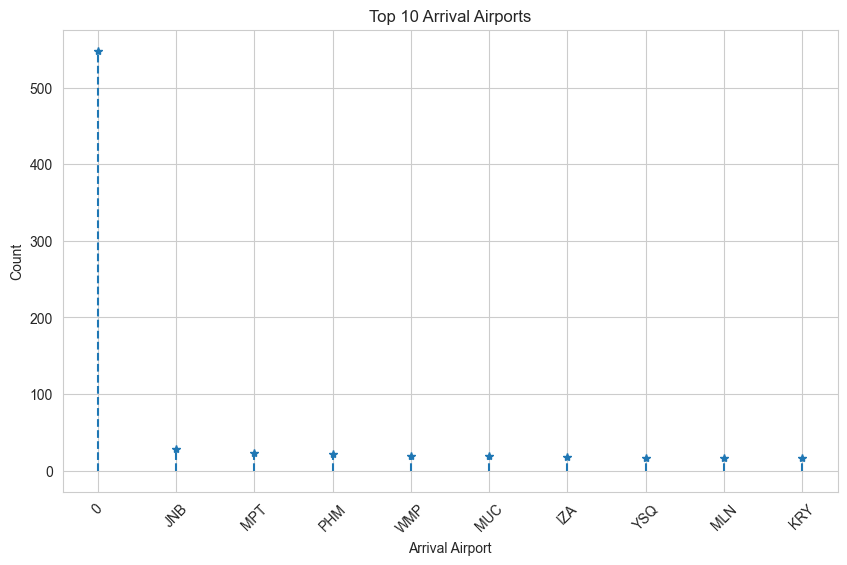

In [53]:

# Top 10 Arrival Airports
top_arrival_airports = df['Arrival_Airport'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.stem(top_arrival_airports.values, basefmt=" ", linefmt='--', markerfmt='*',)
plt.xticks(range(len(top_arrival_airports)), top_arrival_airports.index, rotation=45)
plt.title('Top 10 Arrival Airports')
plt.xlabel('Arrival Airport')
plt.ylabel('Count')
plt.grid(True)
plt.show()


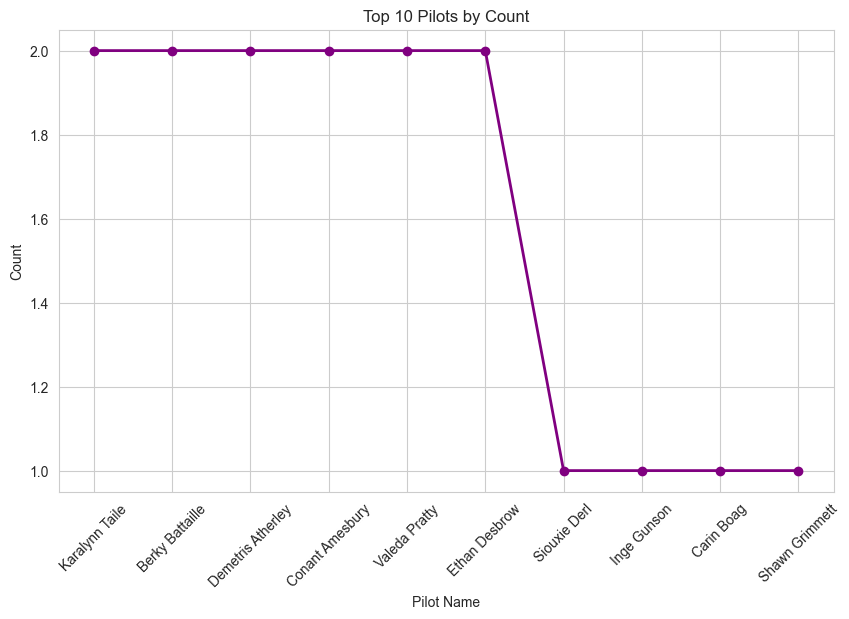

In [56]:
# Top 10 countries by passenger count
top_countries = df['Pilot_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_countries.index, top_countries.values, marker='o', color='purple', linestyle='-', linewidth=2, markersize=6)
plt.title('Top 10 Pilots by Count')
plt.xlabel('Pilot Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


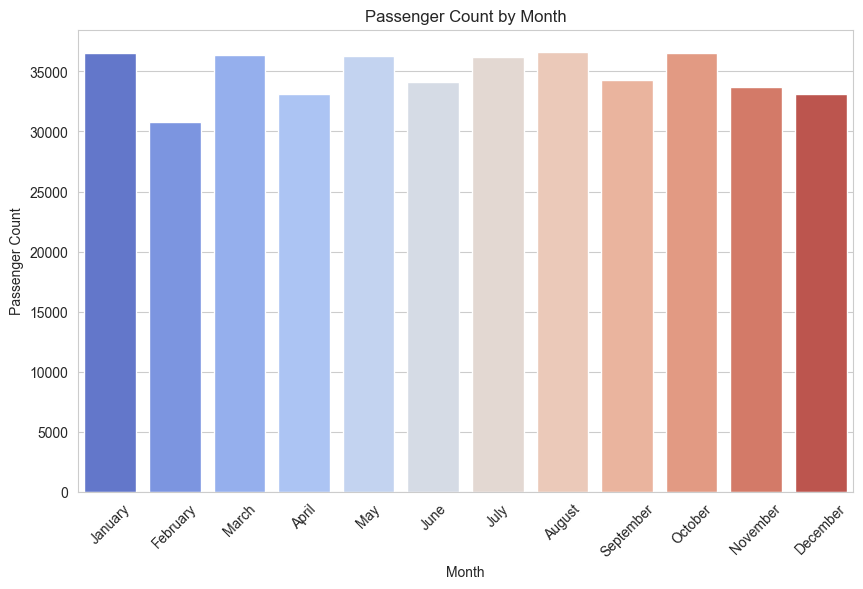

In [30]:
# Passenger Count by Month
df['Month'] = df['Departure_Date'].dt.month_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='coolwarm')
plt.title('Passenger Count by Month')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Checking for duplicate values
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0
